In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

Matplotlib is building the font cache; this may take a moment.


In [7]:

A = np.array([[2, -4, 2, -14],
              [-1, 2, -2, 11],
              [-1, 2, -1, 7]]) #Initializing given
b = np.array([10, -6, -5]) #Initializing given
A_T_A = A.T @ A  #Calculating A^T A
A_T_b = A.T @ b #Calculating A^T b
determinant = np.linalg.det(A_T_A) #Calculating determinant of A^T A
if determinant == 0:
    print("The matrix A^T A is singular.")
    rank_A = np.linalg.matrix_rank(A) #Calculating rank of A
    print("Rank of A:", rank_A)
    augmented_matrix = np.column_stack((A, b))
    rank_augmented = np.linalg.matrix_rank(augmented_matrix) #Calculating rank of augmented matrix
    print("Rank of augmented matrix [A | b]:", rank_augmented)
    if rank_A == rank_augmented:
        print("The system is consistent and hence, multiple solutions exist.")
    else:   
        print("The system is inconsistent and hence, no solution exists.")
else:
    x = np.linalg.inv(A_T_A) @ A_T_b #Calculating least norm solution
    print("The least-norm solution x* is:", x)

The matrix A^T A is singular.
Rank of A: 2
Rank of augmented matrix [A | b]: 2
The system is consistent and hence, multiple solutions exist.


In [8]:
M = A @ A.T 
lambda_ = np.linalg.pinv(M) @ b #Calculating lagrange multipliers
x_star = A.T @ lambda_ #Calculating optimal solution
print("Optimal solution x*:", x_star)
calc = A @ x_star #Calculating Ax
flag=1
for i in range(len(b)):
    if np.abs(calc[i]-b[i]) > 1e-10:
        flag=0 #checking if Ax=b
if flag:
    print("The optimal solution x* satisfies the constraint Ax* = b.")
    print("Calculated Ax:", calc)
    print("Given b:", b)
else:
    print("The optimal solution x* does not satisfy the constraint Ax* = b.")

Optimal solution x*: [ 0.59574468 -1.19148936 -0.36170213 -0.34042553]
The optimal solution x* satisfies the constraint Ax* = b.
Calculated Ax: [10. -6. -5.]
Given b: [10 -6 -5]


At alpha: 0.1 final x_t: [ 0.59575188 -1.19149255 -0.36168404 -0.34042101]
At alpha: 0.25 final x_t: [ 0.59574468 -1.19148936 -0.36170213 -0.34042553]
At alpha: 0.5 final x_t: [ 0.59574468 -1.19148936 -0.36170213 -0.34042553]
At alpha: 0.75 final x_t: [ 0.59574468 -1.19148936 -0.36170213 -0.34042553]
At alpha: 1 final x_t: [ 0.59574468 -1.19148936 -0.36170213 -0.34042553]


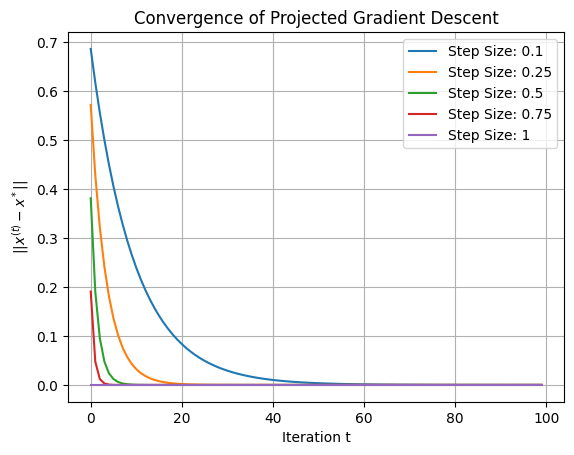

In [9]:
def projection_operator(z):
    return z+A.T @ (np.linalg.pinv(M) @ (b-A @ z)) #defining projection operator
iterations = 100
start_x=np.random.randn(4)  #initializing random x
for alpha in [0.1, 0.25, 0.5, 0.75, 1]:
    x_t = start_x #initializing x_t
    norm_diff = []
    for t in range(iterations):
        gradient = x_t #calculating gradient
        x_t_1 = projection_operator(x_t - alpha * gradient) #updating x_t+1
        norm_diff.append(np.linalg.norm(x_t_1 - x_star))
        x_t = x_t_1 #updating x_t
    print("At alpha:", alpha, "final x_t:", x_t)
    plt.plot(norm_diff, label=f'Step Size: {alpha}')
plt.xlabel('Iteration t')
plt.ylabel(r'$||x^{(t)} - x^*||$')
plt.title('Convergence of Projected Gradient Descent')
plt.legend()
plt.grid()
plt.show()

In [10]:
X = np.loadtxt("Data.csv", delimiter=",") # Load the data points
y = np.loadtxt("Labels.csv", delimiter=",").flatten() # Load the labels
N, n = X.shape
w_p= cp.Variable(n)
b_p = cp.Variable()
primal_obj= cp.Minimize(0.5 * cp.norm(w_p, 2)**2) #defining objective function
const= [cp.multiply(y, X @ w_p + b_p) >= 1] #defining constraints
primal_prob = cp.Problem(primal_obj, const) #defining primal problem 
primal_prob.solve() #solving primal problem
primal_obj_val= primal_prob.value #getting the value of primal objective function
print("The Primal Objective Function Value:", primal_obj_val) #printing the value of primal objective function
print("Optimal w:", w_p.value) #printing the optimal value of w
print("Optimal b:", b_p.value) #printing the optimal value of b

The Primal Objective Function Value: 2.666666052505867
Optimal w: [ 1.1547 -2.    ]
Optimal b: 1.000000000861344


The Dual Objective Function Value: 2.6666119121723715
Optimal lambdas: [ 2.02341460e+00  6.43197311e-01 -4.76601308e-16 -1.35316621e-15
 -7.39986489e-16 -6.24493138e-16  2.36778350e+00 -3.90443121e-16
 -1.66196081e-16  2.98828413e-01]
lambda sum for positive class: 2.6666119118951466
lambda sum for negative class: 2.6666119118951443
gamma_pos - gamma_neg: 2.220446049250313e-15 and is it close to zero?: True
Primal Objective Function Value: 2.666666052505867
Dual Objective Function Value: 2.6666119121723715
Difference between primal and dual objective function values: 5.41403334954893e-05
Optimal primal w*: [ 1.1547 -2.    ]
Optimal primal b*: 1.000000000861344
Optimal dual w*: [ 1.15468499 -1.99995609]
Optimal dual b*: 1.0
Difference between primal and dual w*: 4.640854172979126e-05
Difference between primal and dual b*: 8.613441071503303e-10
The constraints are active at: [0 1 6 9]


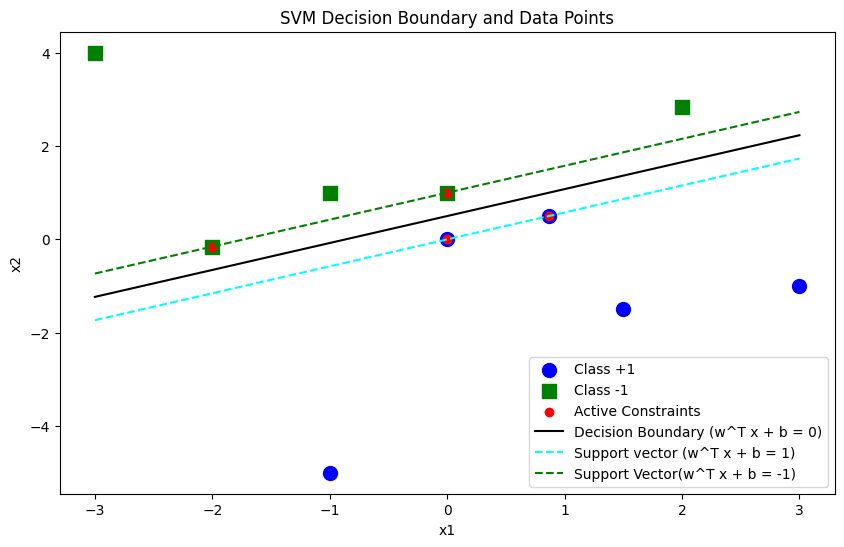

In [11]:

lambdas = cp.Variable(N) #defining lambdas
A = np.outer(y, y) * (X @ X.T) 
ep = 1e-5 
A += ep * np.eye(N) 
dual_obj= cp.Maximize(cp.sum(lambdas) - 0.5 * cp.quad_form(lambdas, A)) #defining objective function
dual_const= [lambdas >= 0, cp.sum(cp.multiply(lambdas, y)) == 0] #defining constraints
dual_problem = cp.Problem(dual_obj, dual_const) #defining dual problem
dual_problem.solve()
dual_obj_val= dual_problem.value #getting the value of dual objective function
print("The Dual Objective Function Value:", dual_obj_val) #printing the value of dual objective function
print("Optimal lambdas:", lambdas.value) #printing the optimal value of lambdas
gamma_p = np.sum(lambdas.value[y == 1])
gamma_n = np.sum(lambdas.value[y == -1])
w_d= np.sum((lambdas.value * y)[:, None] * X, axis=0) #getting the optimal value of w
b_d= y[0] - np.dot(w_d, X[0]) #getting the optimal value of b
print("lambda sum for positive class:", gamma_p)
print("lambda sum for negative class:", gamma_n)
print("gamma_pos - gamma_neg:", gamma_p - gamma_n, "and is it close to zero?:", np.isclose(gamma_p - gamma_n, 0)) #checking if gamma_p - gamma_n is close to zero

# Define dual variables
print("Primal Objective Function Value:", primal_obj_val)
print("Dual Objective Function Value:", dual_obj_val)
print("Difference between primal and dual objective function values:", primal_prob.value - dual_problem.value) #calculating the difference between primal and dual objective function values
print('Optimal primal w*:', w_p.value)
print('Optimal primal b*:', b_p.value)
print('Optimal dual w*:', w_d)
print('Optimal dual b*:', b_d)
print("Difference between primal and dual w*:", np.linalg.norm(w_p.value - w_d)) #calculating the difference between primal and dual w*
print("Difference between primal and dual b*:", np.abs(b_p.value - b_d))

w_opt = w_p.value#getting the optimal value of w
b_opt = b_p.value #getting the optimal value of b
margins = y * (X @ w_opt + b_opt) #calculating the margins
Ac = np.isclose(margins, 1) #checking if the margins are close to 1
active_ones= np.where(Ac)[0] #getting the active constraints
print("The constraints are active at:", active_ones)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', color='blue', label='Class +1',s=100)
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='s', color='green', label='Class -1',s=100)
plt.scatter(X[active_ones, 0], X[active_ones, 1], marker='o', color='red', label='Active Constraints') #plot the active constraints
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100) #plot the decision boundary
y_values = -(w_opt[0] * x_values + b_opt) / w_opt[1] 
plt.plot(x_values, y_values, label='Decision Boundary (w^T x + b = 0)', color='black') 
y_values_margin1 = -(w_opt[0] * x_values + b_opt - 1) / w_opt[1]
y_values_margin2 = -(w_opt[0] * x_values + b_opt + 1) / w_opt[1]
plt.plot(x_values, y_values_margin1, label='Support vector (w^T x + b = 1)', color='cyan', linestyle='--')
plt.plot(x_values, y_values_margin2, label='Support Vector(w^T x + b = -1)', color='green', linestyle='--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM Decision Boundary and Data Points')
plt.show()
